In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from glob import glob

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import numpy as np
import xarray as xr

In [3]:
inputdata = "/glade/p/cesmdata/cseg/inputdata"
badfile = f'{inputdata}/atm/cam/met/nudging/MERRA2_fv09_32L/1988/MERRA2_fv09.cam2.i.1988-04-02-75600.nc'

allfiles = sorted(glob(f'{inputdata}/atm/cam/met/nudging/MERRA2_fv09_32L/1988/*.nc'))
os.environ['FILE'] = badfile
ibad = allfiles.index(badfile)

In [4]:
!echo ${FILE}

/glade/p/cesmdata/cseg/inputdata/atm/cam/met/nudging/MERRA2_fv09_32L/1988/MERRA2_fv09.cam2.i.1988-04-02-75600.nc


In [5]:
!ncdump -h ${FILE}

netcdf MERRA2_fv09.cam2.i.1988-04-02-75600 {
dimensions:
	lat = 192 ;
	lon = 288 ;
	slat = 191 ;
	slon = 288 ;
	lev = 32 ;
	ilev = 33 ;
	time = UNLIMITED ; // (1 currently)
	scalar = 1 ;
	ncl8 = 1 ;
	ncl9 = 1 ;
	ncl10 = 1 ;
	ncl11 = 1 ;
variables:
	double time(time) ;
		time:long_name = "time" ;
		time:units = "days since base date (nbdate)" ;
		time:calendar = "noleap" ;
		time:_FillValue = 9.96920996838687e+36 ;
	int ndbase(scalar) ;
		ndbase:long_name = "base day" ;
	int nsbase(scalar) ;
		nsbase:long_name = "seconds of base day" ;
	int nbdate(scalar) ;
		nbdate:long_name = "base date (YYYYMMDD)" ;
	int nbsec(scalar) ;
		nbsec:long_name = "seconds of base date" ;
	int ndcur(time) ;
		ndcur:long_name = "current day (from base day)" ;
		ndcur:_FillValue = -2147483647 ;
	int nscur(time) ;
		nscur:long_name = "current seconds of current day" ;
	int date(time) ;
		date:long_name = "current date (YYYYMMDD)" ;
	int datesec(time) ;
		datesec:long_name = "current seconds of current date" ;
	

In [6]:
ds_good = xr.open_dataset(allfiles[ibad-1], decode_times=False)
ds_good

<xarray.Dataset>
Dimensions:  (time: 1, scalar: 1, lev: 32, ilev: 33, lat: 192, lon: 288, slat: 191, slon: 288)
Coordinates:
  * time     (time) float64 0.75
  * lev      (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * ilev     (ilev) float64 2.255 5.032 10.16 18.56 ... 947.4 967.5 985.1 1e+03
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * slat     (slat) float64 -89.53 -88.59 -87.64 -86.7 ... 87.64 88.59 89.53
  * slon     (slon) float64 -0.625 0.625 1.875 3.125 ... 354.4 355.6 356.9 358.1
Dimensions without coordinates: scalar
Data variables: (12/26)
    ndbase   (scalar) int32 ...
    nsbase   (scalar) int32 ...
    nbdate   (scalar) int32 ...
    nbsec    (scalar) int32 ...
    ndcur    (time) float64 ...
    nscur    (time) int32 ...
    ...       ...
    US       (time, lev, slat, lon) float32 ...
    VS       (time, lev, lat, slon) float32 ...
    T        (time, lev, lat, lon) float32 ...
    Q        (time, lev, lat, lon) float32 ...
    PS       (time, lat, lon) float32 ...
    PHIS     (time, lat, lon) float32 ...
Attributes: (12/16)
    Conventions:            NCAR-CSM
    Description:            Re-gridded CAM Initial Conditions from the follow...
    source1:                /glade/collections/rda/data/ds313.3/orig_res/1988...
    source2:                /glade/collections/rda/data/ds313.3/orig_res/1988...
    source3:                /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/fv_...
    source_lev_info:        /glade/p/acom/acom-climate/tilmes/inputdata/init/...
    ...                     ...
    Command:                NCL script
    Date_Written:           Fri Mar 18 13:46:00 MDT 2022
    case:                   MERRA2_fv09
    ps_adjust:              True; Adjust Ps per ECMWF algorithm
    q_adjust:               True; Eliminate super-saturation
    interp_log_ps:          True; Interpolate ln(Ps) rather than Ps

In [7]:
ds_bad = xr.open_dataset(allfiles[ibad], decode_times=False)
ds_bad

<xarray.Dataset>
Dimensions:  (time: 1, scalar: 1, lev: 32, ilev: 33, lat: 192, lon: 288, slat: 191, slon: 288)
Coordinates:
  * time     (time) float64 0.875
  * lev      (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * ilev     (ilev) float64 2.255 5.032 10.16 18.56 ... 947.4 967.5 985.1 1e+03
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * slat     (slat) float64 -89.53 -88.59 -87.64 -86.7 ... 87.64 88.59 89.53
  * slon     (slon) float64 -0.625 0.625 1.875 3.125 ... 354.4 355.6 356.9 358.1
Dimensions without coordinates: scalar
Data variables: (12/26)
    ndbase   (scalar) int32 ...
    nsbase   (scalar) int32 ...
    nbdate   (scalar) int32 ...
    nbsec    (scalar) int32 ...
    ndcur    (time) float64 ...
    nscur    (time) int32 ...
    ...       ...
    US       (time, lev, slat, lon) float32 ...
    VS       (time, lev, lat, slon) float32 ...
    T        (time, lev, lat, lon) float32 ...
    Q        (time, lev, lat, lon) float32 ...
    PS       (time, lat, lon) float32 ...
    PHIS     (time, lat, lon) float32 ...
Attributes: (12/16)
    Conventions:            NCAR-CSM
    Description:            Re-gridded CAM Initial Conditions from the follow...
    source1:                /glade/collections/rda/data/ds313.3/orig_res/1988...
    source2:                /glade/collections/rda/data/ds313.3/orig_res/1988...
    source3:                /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/fv_...
    source_lev_info:        /glade/p/acom/acom-climate/tilmes/inputdata/init/...
    ...                     ...
    Command:                NCL script
    Date_Written:           Fri Mar 18 13:46:15 MDT 2022
    case:                   MERRA2_fv09
    ps_adjust:              True; Adjust Ps per ECMWF algorithm
    q_adjust:               True; Eliminate super-saturation
    interp_log_ps:          True; Interpolate ln(Ps) rather than Ps

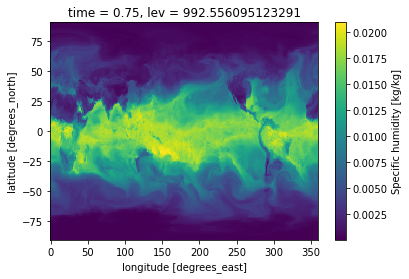

In [8]:
ds_good.Q.isel(lev=-1).plot()

In [9]:
for v in ['T', 'Q', 'U', 'V']:
    print(v)
    
    print((ds_bad[v] == ds_bad[v][0, 0, 0, 0].values).all())
    

T
<xarray.DataArray 'T' ()>
array(False)
Q
<xarray.DataArray 'Q' ()>
array(False)
U
<xarray.DataArray 'U' ()>
array(False)
V
<xarray.DataArray 'V' ()>
array(False)


In [10]:
ds_bad.V[0, 0, 0, 0].values

array(15.7733345, dtype=float32)